In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from warnings import filterwarnings
filterwarnings('ignore')

# Question 1

# i.) How many training and test examples are there? You can use np.loadtxt for this purpose. Show at least 10 randomly selected objects of each class using plt.matshow.

## Reading the Datasets

In [2]:
Xtrain=np.loadtxt("Xtrain.csv")
Xtest=np.loadtxt("Xtest.csv")
Ytrain=np.loadtxt("Ytrain.csv")

In [3]:
print("The Total training examples are: ", len(Xtrain))
print("The Total test examples are: ", len(Xtest))

The Total training examples are:  3000
The Total test examples are:  3000


In [4]:
pos=[]
neg=[]

for index, label in enumerate(Ytrain):
    if label==1:
        pos.append(Xtrain[index])
    elif label==-1:
        neg.append(Xtrain[index])

## 10 randomly selected objects of Positive class

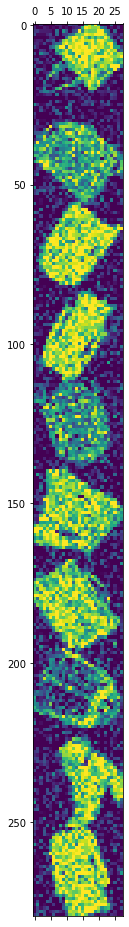

In [5]:
# 10 Positive class examples
plt.matshow(np.array(random.sample(pos,10)).reshape(280,28))
plt.show()

## 10 randomly selected objects of Positive class

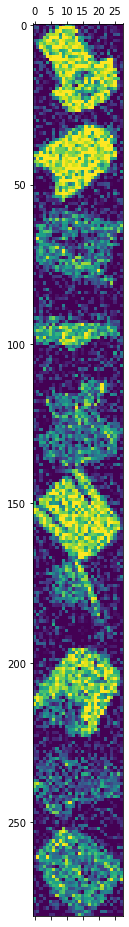

In [6]:
# 10 Negative class examples
plt.matshow(np.array(random.sample(neg,10)).reshape(280,28))
plt.show()

# ii.)  How many positive and negative examples are there in the training dataset?

## Checking the Number of Positive and Negative Examples

In [7]:
p=0
n=0
for i in range(len(Ytrain)):
    if(Ytrain[i]>0):
        p=p+1
    elif(Ytrain[i]<0):
        n=n+1
print("The Total positive examples there in the training dataset are: ", p)
print("The Total negative examples there in the training dataset are: ", n)

The Total positive examples there in the training dataset are:  2118
The Total negative examples there in the training dataset are:  882


# iii.) Which performance metric (accuracy, AUC-ROC and AUC-PR) should be used? Give your reasoning.

### AUC_PR

 * Since we are dealing with an imbalanced dataset where we have approximately 70% of examples as positive and 30% as negative examples. Here accuracy is definitely not a good performance metric as it relies heavily on test data.
 * Now we have to make a choice between AUC_ROC and AUC_PR.
 *  The PR curve focuses more on the minority class, whereas the ROC curve covers both classes and incase of our imbalanced dataset, AUC_PR should be used as then our predictions would not biased towards any class.
 * In the AUC-PR curve our data is mapped on a curve with the X-axis as the recall which is the sensitivity equivalent to the true positive rate(TPR) and the y-axis of precision which is the ratio of TPR/P' (P' - P prime, i.e the total positive values that are predicted).

# iv.) What is the expected accuracy of a random classifier (one that generates random labels for a given example) for this problem over the training and test datasets? Demonstrate why this would be the case.

In [8]:
from sklearn.dummy import DummyClassifier
from sklearn import metrics

from sklearn.metrics import roc_auc_score,roc_curve,plot_confusion_matrix




In [9]:
dummy=DummyClassifier(strategy='most_frequent')
dummy.fit(Xtrain,Ytrain)
Ytest=dummy.predict(Xtest)

In [10]:
print("The Accuracy Score from training examples is: ",dummy.score(Xtrain,Ytrain))

The Accuracy Score from training examples is:  0.706


In [11]:
print("The Accuracy Score from testing examples is: ",dummy.score(Xtest,Ytrain))

The Accuracy Score from testing examples is:  0.706


## v.) What is the AUC-ROC and AUC-PR of a random classifier for this problem over the training and test datasets? Demonstrate why this would be the case.

In [12]:
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve



# AUC_ROC for a random classifier

The AUC_ROC score for Training Examples = 0.503


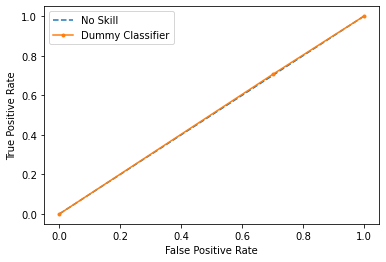

In [52]:
model = DummyClassifier(strategy='stratified')
model.fit(Xtrain, Ytrain)
# predict probabilities
Ytest=model.predict(Xtest)
yhat = model.predict_proba(Xtest)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(Ytrain, pos_probs)
print('The AUC_ROC score for Training Examples = %.3f' % roc_auc)
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(Ytrain, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Dummy Classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

The AUC_ROC score for Testing Examples = 0.496


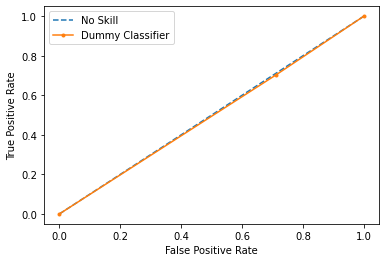

In [53]:
# model = DummyClassifier(strategy='stratified')
# model.fit(Xtrain, Ytrain)
# # predict probabilities
# Ytest=model.predict(Xtest)
# yhat = model.predict_proba(Xtest)
# # retrieve just the probabilities for the positive class
# pos_probs = yhat[:, 1]
# # calculate roc auc
roc_auc = roc_auc_score(Ytest, pos_probs)
print('The AUC_ROC score for Testing Examples = %.3f' % roc_auc)
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(Ytest, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Dummy Classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# AUC_PR of a random classifier

The AUC_PR score for Training Examples = 0.811


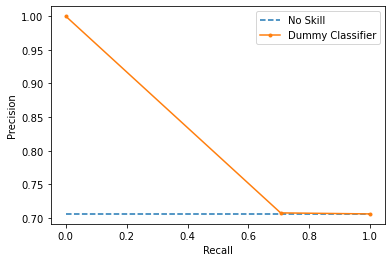

In [56]:
from sklearn.metrics import auc


# model = DummyClassifier(strategy='uniform')
# model.fit(Xtrain, Ytrain)
# # predict probabilities
# yhat = model.predict_proba(Xtest)
# # retrieve just the probabilities for the positive class
# pos_probs = yhat[:, 1]
# calculate the no skill line as the proportion of the positive class
no_skill = len(Ytrain[Ytrain==1]) / len(Ytrain)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(Ytrain, pos_probs)
# calculate the precision-recall auc
auc_score = auc(recall, precision)
print('The AUC_PR score for Training Examples = %.3f' % auc_score)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Dummy Classifier')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

The AUC_ROC score for Testing Examples = 0.808


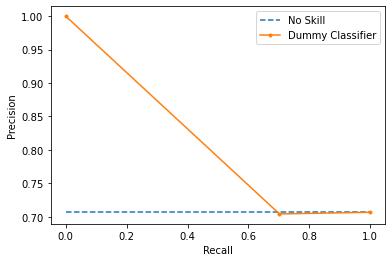

In [57]:
no_skill = len(Ytest[Ytest==1]) / len(Ytest)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(Ytest, pos_probs)
# calculate the precision-recall auc
auc_score = auc(recall, precision)
print('The AUC_ROC score for Testing Examples = %.3f' % auc_score)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Dummy Classifier')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## Inference

* We can infer that Accuracy, AUC_ROC and AUC_PR are giving different results for the same dummy classifiers.
* This is the case as Accuracy is a metric which is biased towards our test dataset.
* For AUC_ROC it takes into consideration that we are given balanced data and distributed the labels equally, hence has predicted the scores as 50% for both classes.
* For AUC_PR it takes into account that we have a class imbalance and tends to rely more on the minority class hence giving us a different score.
* Neither of them is wrong and are doing the job perfectly but since in our case, we clearly have a class imbalance, we will choose AUC_PR as the method to go to.

# Question No. 2: 
# (K Nearest Neighbor Classifier, n_neighbour=1 and 5 fold stratified cross validation )

# i.) What is the prediction accuracy, AUC-ROC and AUC-PR for each fold using this classifier?


In [3]:
from sklearn.model_selection import cross_val_score
def stratifiedkf(x,classifier):
    acc=cross_val_score(classifier,x,Ytrain,scoring='accuracy',cv=5)
    auc_roc=cross_val_score(classifier,x,Ytrain,scoring='roc_auc',cv=5)
    auc_pr=cross_val_score(classifier,x,Ytrain,scoring='average_precision',cv=5)
    
    for index, item in enumerate(acc):
        print('----------------------Fold', index+1,"-----------------'")
        print('Prediction Accuracy:', item, "\n", "AUC_ROC:", auc_roc[index],  "\n", "AUC_PR:", auc_pr[index])
    print("___________________________________________________________")    
    print('--Mean of the Respective Performance Metric')
    print('\n')
    print('Accuracy Mean:', np.round(acc.mean(),4))
    print('AUC_ROC Mean:', np.round(auc_roc.mean(),4))
    print('AUC_PR Mean:', np.round(auc_pr.mean(),4))
    print("___________________________________________________________") 
    print('--Standard Deviation of the Respective Performance Metric')
    print('\n')
    print('Accuracy Standard Deviation', np.round(acc.std(),4))
    print('AUC_ROC Standard Deviation', np.round(auc_roc.std(),4))
    print('AUC_PR Standard Deviation', np.round(auc_pr.std(),4))

In [4]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score

In [5]:
knn=KNeighborsClassifier(n_neighbors=1)
# print(knn)
stratifiedkf(Xtrain,knn)

----------------------Fold 1 -----------------'
Prediction Accuracy: 0.74 
 AUC_ROC: 0.708029588336192 
 AUC_PR: 0.80877887867008
----------------------Fold 2 -----------------'
Prediction Accuracy: 0.76 
 AUC_ROC: 0.7321505145797599 
 AUC_PR: 0.8226719288265225
----------------------Fold 3 -----------------'
Prediction Accuracy: 0.74 
 AUC_ROC: 0.7130145797598627 
 AUC_PR: 0.8118697856501091
----------------------Fold 4 -----------------'
Prediction Accuracy: 0.7383333333333333 
 AUC_ROC: 0.712565612854109 
 AUC_PR: 0.8104761471782749
----------------------Fold 5 -----------------'
Prediction Accuracy: 0.755 
 AUC_ROC: 0.7293144208037826 
 AUC_PR: 0.8200355209945879
___________________________________________________________
--Mean of the Respective Performance Metric


Accuracy Mean: 0.7467
AUC_ROC Mean: 0.719
AUC_PR Mean: 0.8148
___________________________________________________________
--Standard Deviation of the Respective Performance Metric


Accuracy Standard Deviation 0.009
AU

## Alternate Method

In [6]:


folds=0
skf= StratifiedKFold(n_splits=5)
acc=[]
auc=[]
pr=[]
for train_index, val_index in skf.split(Xtrain,Ytrain):
    folds+=1
    print(f'----------{folds} fold------------')
    print("Train set samples:", train_index.shape[0], "Validation Set Samples:", val_index.shape[0])
    X_train, X_val = Xtrain[train_index], Xtrain[val_index]
    y_train, y_val = Ytrain[train_index], Ytrain[val_index]
    knn=KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train,y_train)
    knn_pred_score= knn.predict_proba(X_val)[:,1]
    knn_pred= knn.predict(X_val)
    print(f'Accuracy Score: {np.round(accuracy_score(y_val,knn_pred),4)}')
    acc.append(accuracy_score(y_val,knn_pred))
    print(f'AUC_ROC Score: {np.round(roc_auc_score(y_val,knn_pred_score),4)}')
    auc.append(roc_auc_score(y_val,knn_pred_score))
    print(f'AUC_PR Score: {np.round(average_precision_score(y_val,knn_pred_score),4)}')
    pr.append(average_precision_score(y_val,knn_pred_score))

----------1 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.74
AUC_ROC Score: 0.708
AUC_PR Score: 0.8088
----------2 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.76
AUC_ROC Score: 0.7322
AUC_PR Score: 0.8227
----------3 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.74
AUC_ROC Score: 0.713
AUC_PR Score: 0.8119
----------4 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.7383
AUC_ROC Score: 0.7126
AUC_PR Score: 0.8105
----------5 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.755
AUC_ROC Score: 0.7293
AUC_PR Score: 0.82


# ii.) What is the mean and standard deviation of each performance metric (accuracy, AUC-ROC and AUC-PR)across all the folds for this classifier?

In [7]:
print("Mean of Accuracies: ",np.round(np.mean(acc),4))
print("Mean of AUC_ROC: ",np.round(np.mean(auc),4))
print("Mean of AUC_PR: ",np.round(np.mean(pr),4))

Mean of Accuracies:  0.7467
Mean of AUC_ROC:  0.719
Mean of AUC_PR:  0.8148


In [8]:
print("Standard Deviation of Accuracies: ",np.round(np.std(acc),4))
print("Standard Deviation of AUC_ROC: ",np.round(np.std(auc),4))
print("Standard Deviation of AUC_PR: ",np.round(np.std(pr),4))

Standard Deviation of Accuracies:  0.009
Standard Deviation of AUC_ROC:  0.0098
Standard Deviation of AUC_PR:  0.0055


## Since Both Methods give the exact same result hence either can be used as per user preference.

## --> I however, was not sure which method is acceptable for Grading hence have shown observations for the upcoming questions using both the ways.

# iii.) What is the impact of various forms of pre-processing on the cross-validation performance?

##  --> Standardization using StandardScaler

In [10]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler().fit(Xtrain)
X_scaled = scaler.transform(Xtrain)

In [92]:
stratifiedkf(X_scaled,knn)

----------------------Fold 1 -----------------'
Prediction Accuracy: 0.7316666666666667 
 AUC_ROC: 0.6971483704974272 
 AUC_PR: 0.8026155010166927
----------------------Fold 2 -----------------'
Prediction Accuracy: 0.76 
 AUC_ROC: 0.7288271869639793 
 AUC_PR: 0.8205413967896367
----------------------Fold 3 -----------------'
Prediction Accuracy: 0.76 
 AUC_ROC: 0.7271655231560892 
 AUC_PR: 0.8194847126222057
----------------------Fold 4 -----------------'
Prediction Accuracy: 0.74 
 AUC_ROC: 0.7038906919902232 
 AUC_PR: 0.8049975068780834
----------------------Fold 5 -----------------'
Prediction Accuracy: 0.7333333333333333 
 AUC_ROC: 0.6991625596025163 
 AUC_PR: 0.802479840262595
___________________________________________________________
--Mean of the Respective Performance Metric


Accuracy Mean: 0.745
AUC_ROC Mean: 0.7112
AUC_PR Mean: 0.81
___________________________________________________________
--Standard Deviation of the Respective Performance Metric


Accuracy Standard Devi

In [94]:
folds=0
skf= StratifiedKFold(n_splits=5)
xacc=[]
xauc=[]
xpr=[]
for train_index, val_index in skf.split(X_scaled,Ytrain):
    folds+=1
    print(f'----------{folds} fold------------')
    print("Train set samples:", train_index.shape[0], "Validation Set Samples:", val_index.shape[0])
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = Ytrain[train_index], Ytrain[val_index]
    knn=KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train,y_train)
    knn_pred_score= knn.predict_proba(X_val)[:,1]
    knn_pred= knn.predict(X_val)
    print(f'Accuracy Score: {accuracy_score(y_val,knn_pred)}')
    xacc.append(accuracy_score(y_val,knn_pred))
    print(f'AUC_ROC Score: {roc_auc_score(y_val,knn_pred_score)}')
    xauc.append(roc_auc_score(y_val,knn_pred_score))
    print(f'AUC_PR Score: {average_precision_score(y_val,knn_pred)}')
    xpr.append(average_precision_score(y_val,knn_pred))

----------1 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.7316666666666667
AUC_ROC Score: 0.6971483704974272
AUC_PR Score: 0.8026155010166927
----------2 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.76
AUC_ROC Score: 0.7288271869639793
AUC_PR Score: 0.8205413967896367
----------3 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.76
AUC_ROC Score: 0.7271655231560892
AUC_PR Score: 0.8194847126222057
----------4 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.74
AUC_ROC Score: 0.7038906919902232
AUC_PR Score: 0.8049975068780834
----------5 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.7333333333333333
AUC_ROC Score: 0.6991625596025163
AUC_PR Score: 0.802479840262595


In [95]:
print("Mean of Accuracies: ",np.round(np.mean(xacc),4))
print("Mean of AUC_ROC: ",np.round(np.mean(xauc),4))
print("Mean of AUC_PR: ",np.round(np.mean(xpr),4))

Mean of Accuracies:  0.745
Mean of AUC_ROC:  0.7112
Mean of AUC_PR:  0.81


In [96]:
print("Standard Deviation of Accuracies: ",np.round(np.std(xacc),4))
print("Standard Deviation of AUC_ROC: ",np.round(np.std(xauc),4))
print("Standard Deviation of AUC_PR: ",np.round(np.std(xpr),4))

Standard Deviation of Accuracies:  0.0126
Standard Deviation of AUC_ROC:  0.0139
Standard Deviation of AUC_PR:  0.0082


## --> Min-Max-Scaler

In [97]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(Xtrain)

stratifiedkf(X_train_minmax,knn)

----------------------Fold 1 -----------------'
Prediction Accuracy: 0.74 
 AUC_ROC: 0.7047062607204116 
 AUC_PR: 0.8067452830188679
----------------------Fold 2 -----------------'
Prediction Accuracy: 0.7566666666666667 
 AUC_ROC: 0.7264686963979416 
 AUC_PR: 0.8192669025157233
----------------------Fold 3 -----------------'
Prediction Accuracy: 0.745 
 AUC_ROC: 0.7148906518010292 
 AUC_PR: 0.8127299082743216
----------------------Fold 4 -----------------'
Prediction Accuracy: 0.7416666666666667 
 AUC_ROC: 0.7132868533878272 
 AUC_PR: 0.8107177400967227
----------------------Fold 5 -----------------'
Prediction Accuracy: 0.7533333333333333 
 AUC_ROC: 0.7248467363865849 
 AUC_PR: 0.8172761134037194
___________________________________________________________
--Mean of the Respective Performance Metric


Accuracy Mean: 0.7473
AUC_ROC Mean: 0.7168
AUC_PR Mean: 0.8133
___________________________________________________________
--Standard Deviation of the Respective Performance Metric


Acc

In [98]:
folds=0
skf= StratifiedKFold(n_splits=5)
mmacc=[]
mmauc=[]
mmpr=[]
for train_index, val_index in skf.split(X_train_minmax,Ytrain):
    folds+=1
    print(f'----------{folds} fold------------')
    print("Train set samples:", train_index.shape[0], "Validation Set Samples:", val_index.shape[0])
    X_train, X_val = X_train_minmax[train_index], X_train_minmax[val_index]
    y_train, y_val = Ytrain[train_index], Ytrain[val_index]
    knn=KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train,y_train)
    knn_pred_score= knn.predict_proba(X_val)[:,1]
    knn_pred= knn.predict(X_val)
    print(f'Accuracy Score: {accuracy_score(y_val,knn_pred)}')
    mmacc.append(accuracy_score(y_val,knn_pred))
    print(f'AUC_ROC Score: {roc_auc_score(y_val,knn_pred_score)}')
    mmauc.append(roc_auc_score(y_val,knn_pred_score))
    print(f'AUC_PR Score: {average_precision_score(y_val,knn_pred)}')
    mmpr.append(average_precision_score(y_val,knn_pred))

----------1 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.74
AUC_ROC Score: 0.7047062607204116
AUC_PR Score: 0.8067452830188679
----------2 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.7566666666666667
AUC_ROC Score: 0.7264686963979416
AUC_PR Score: 0.8192669025157233
----------3 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.745
AUC_ROC Score: 0.7148906518010292
AUC_PR Score: 0.8127299082743216
----------4 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.7416666666666667
AUC_ROC Score: 0.7132868533878272
AUC_PR Score: 0.8107177400967227
----------5 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.7533333333333333
AUC_ROC Score: 0.7248467363865849
AUC_PR Score: 0.8172761134037194


In [99]:
print("Mean of Accuracies: ",np.round(np.mean(mmacc),4))
print("Mean of AUC_ROC: ",np.round(np.mean(mmauc),4))
print("Mean of AUC_PR: ",np.round(np.mean(mmpr),4))

Mean of Accuracies:  0.7473
Mean of AUC_ROC:  0.7168
Mean of AUC_PR:  0.8133


In [100]:
print("Standard Deviation of Accuracies: ",np.round(np.std(mmacc),4))
print("Standard Deviation of AUC_ROC: ",np.round(np.std(mmauc),4))
print("Standard Deviation of AUC_PR: ",np.round(np.std(mmpr),4))

Standard Deviation of Accuracies:  0.0065
Standard Deviation of AUC_ROC:  0.008
Standard Deviation of AUC_PR:  0.0045


## --> Normalizing  (norm='max')

In [11]:
X_normalized = preprocessing.normalize(Xtrain, norm='max')
stratifiedkf(X_normalized,knn)

----------------------Fold 1 -----------------'
Prediction Accuracy: 0.7366666666666667 
 AUC_ROC: 0.702347770154374 
 AUC_PR: 0.8054933176100629
----------------------Fold 2 -----------------'
Prediction Accuracy: 0.7616666666666667 
 AUC_ROC: 0.7300064322469982 
 AUC_PR: 0.8211790502052219
----------------------Fold 3 -----------------'
Prediction Accuracy: 0.7466666666666667 
 AUC_ROC: 0.7144082332761579 
 AUC_PR: 0.8123270440251572
----------------------Fold 4 -----------------'
Prediction Accuracy: 0.7516666666666667 
 AUC_ROC: 0.7203790519693873 
 AUC_PR: 0.8145449172576833
----------------------Fold 5 -----------------'
Prediction Accuracy: 0.755 
 AUC_ROC: 0.7342428977841888 
 AUC_PR: 0.823256440252492
___________________________________________________________
--Mean of the Respective Performance Metric


Accuracy Mean: 0.7503
AUC_ROC Mean: 0.7203
AUC_PR Mean: 0.8154
___________________________________________________________
--Standard Deviation of the Respective Performance 

In [102]:
folds=0
skf= StratifiedKFold(n_splits=5)
nacc=[]
nauc=[]
npr=[]
for train_index, val_index in skf.split(X_normalized,Ytrain):
    folds+=1
    print(f'----------{folds} fold------------')
    print("Train set samples:", train_index.shape[0], "Validation Set Samples:", val_index.shape[0])
    X_train, X_val = X_normalized[train_index], X_normalized[val_index]
    y_train, y_val = Ytrain[train_index], Ytrain[val_index]
    knn=KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train,y_train)
    knn_pred_score= knn.predict_proba(X_val)[:,1]
    knn_pred= knn.predict(X_val)
    print(f'Accuracy Score: {accuracy_score(y_val,knn_pred)}')
    nacc.append(accuracy_score(y_val,knn_pred))
    print(f'AUC_ROC Score: {roc_auc_score(y_val,knn_pred_score)}')
    nauc.append(roc_auc_score(y_val,knn_pred_score))
    print(f'AUC_PR Score: {average_precision_score(y_val,knn_pred)}')
    npr.append(average_precision_score(y_val,knn_pred))

----------1 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.7366666666666667
AUC_ROC Score: 0.702347770154374
AUC_PR Score: 0.8054933176100629
----------2 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.7616666666666667
AUC_ROC Score: 0.7300064322469982
AUC_PR Score: 0.8211790502052219
----------3 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.7466666666666667
AUC_ROC Score: 0.7144082332761579
AUC_PR Score: 0.8123270440251572
----------4 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.7516666666666667
AUC_ROC Score: 0.7203790519693873
AUC_PR Score: 0.8145449172576833
----------5 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.755
AUC_ROC Score: 0.7342428977841888
AUC_PR Score: 0.823256440252492


In [105]:
print("Mean of Accuracies: ",np.round(np.mean(nacc),4))
print("Mean of AUC_ROC: ",np.round(np.mean(nauc),4))
print("Mean of AUC_PR: ",np.round(np.mean(npr),4))

Mean of Accuracies:  0.7503
Mean of AUC_ROC:  0.7203
Mean of AUC_PR:  0.8154


In [106]:
print("Standard Deviation of Accuracies: ",np.round(np.std(nacc),4))
print("Standard Deviation of AUC_ROC: ",np.round(np.std(nauc),4))
print("Standard Deviation of AUC_PR: ",np.round(np.std(npr),4))

Standard Deviation of Accuracies:  0.0084
Standard Deviation of AUC_ROC:  0.0114
Standard Deviation of AUC_PR:  0.0064


### Preprocessing Observation
* All the Preprocessing Steps (Standardization, Min_Max_Scaler, Normalization ) give approximately the same output and theres hardly any significant impact on the cross validation performance, however we will choose normalization as the most optimal method for preprocessing as it has the lowest deviation and the highest mean values

# iv.) Use 5-fold cross-validation over training data to calculate the optimal value of k for the k-Nearest neighbour classifier. What is the optimal value of k and what are the crossvalidation accuracy, AUC-ROC and AUC-PR?

Minimum MSE:- 0.9546666666666667 at K = 6


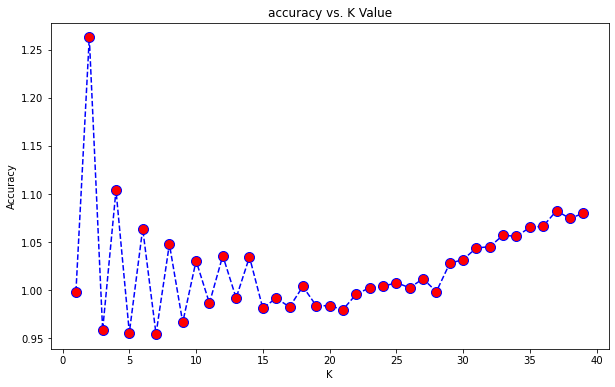

In [107]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = abs(cross_val_score(knn, X_normalized, Ytrain, cv=5, scoring='neg_mean_squared_error'))
    acc.append(scores.mean())
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Minimum MSE:-",min(acc),"at K =",acc.index(min(acc)))

Maximum accuracy:- 0.7613333333333333 at K = 6


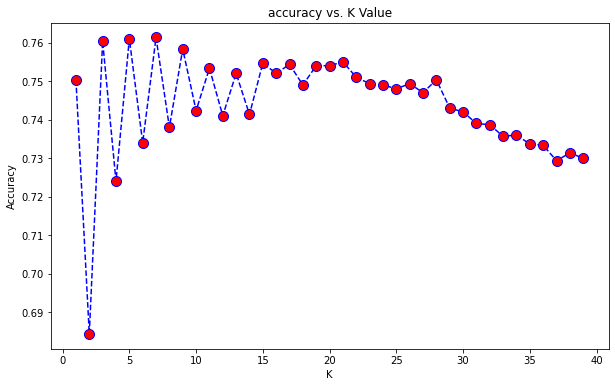

In [108]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_normalized, Ytrain, cv=5, scoring='accuracy')
    acc.append(scores.mean())
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Maximum AUC_ROC:- 0.782221659515516 at K = 4


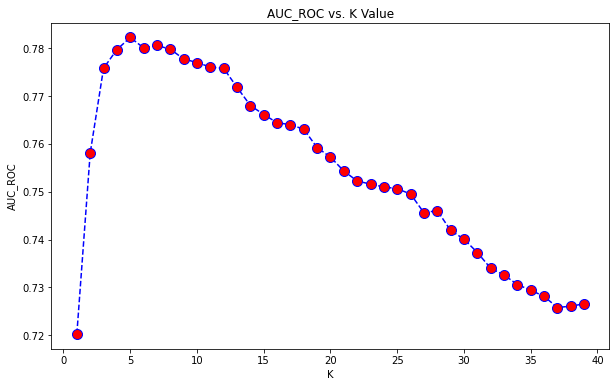

In [109]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_normalized, Ytrain, cv=5, scoring='roc_auc')
    acc.append(scores.mean())
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('AUC_ROC vs. K Value')
plt.xlabel('K')
plt.ylabel('AUC_ROC')
print("Maximum AUC_ROC:-",max(acc),"at K =",acc.index(max(acc)))

Maximum AUC_PR:- 0.8745000669517854 at K = 11


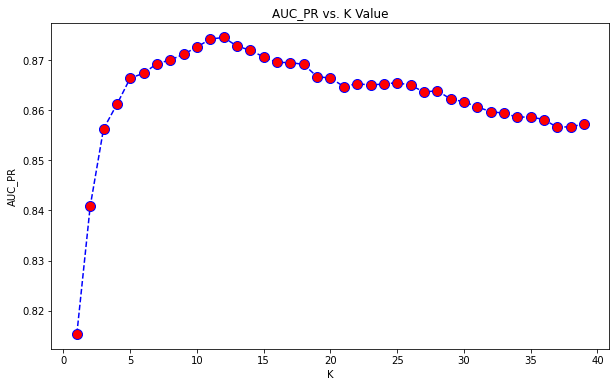

In [110]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_normalized, Ytrain, cv=5, scoring='average_precision')
    acc.append(scores.mean())
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('AUC_PR vs. K Value')
plt.xlabel('K')
plt.ylabel('AUC_PR')
print("Maximum AUC_PR:-",max(acc),"at K =",acc.index(max(acc)))

From the various evaluation methods, 
We can observe that we are recieving the same value of<b> k=6</b> which is giving us the least mean square error and the highest achievable accuracy in the same value for K. Hence,
## The optimal value of K=6 

In [12]:
knn=KNeighborsClassifier(n_neighbors=6)
stratifiedkf(X_normalized,knn)

----------------------Fold 1 -----------------'
Prediction Accuracy: 0.72 
 AUC_ROC: 0.7534707332761579 
 AUC_PR: 0.8447480883483811
----------------------Fold 2 -----------------'
Prediction Accuracy: 0.7166666666666667 
 AUC_ROC: 0.7895717195540308 
 AUC_PR: 0.8793641525284808
----------------------Fold 3 -----------------'
Prediction Accuracy: 0.7516666666666667 
 AUC_ROC: 0.7931362564322469 
 AUC_PR: 0.8759398688635345
----------------------Fold 4 -----------------'
Prediction Accuracy: 0.715 
 AUC_ROC: 0.762237715537391 
 AUC_PR: 0.8528664080352062
----------------------Fold 5 -----------------'
Prediction Accuracy: 0.7666666666666667 
 AUC_ROC: 0.8018525196671608 
 AUC_PR: 0.8838192608965806
___________________________________________________________
--Mean of the Respective Performance Metric


Accuracy Mean: 0.734
AUC_ROC Mean: 0.7801
AUC_PR Mean: 0.8673
___________________________________________________________
--Standard Deviation of the Respective Performance Metric


Accur

In [123]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score

folds=0
skf= StratifiedKFold(n_splits=5)
xacc=[]
xauc=[]
xpr=[]
for train_index, val_index in skf.split(X_normalized,Ytrain):
    folds+=1
    print(f'----------{folds} fold------------')
    print("Train set samples:", train_index.shape[0], "Validation Set Samples:", val_index.shape[0])
    X_train, X_val = X_normalized[train_index], X_normalized[val_index]
    y_train, y_val = Ytrain[train_index], Ytrain[val_index]
    knn=KNeighborsClassifier(n_neighbors=6)
    knn.fit(X_train,y_train)
    knn_pred_score= knn.predict_proba(X_val)[:,1]
    knn_pred= knn.predict(X_val)
    print(f'Accuracy Score: {accuracy_score(y_val,knn_pred)}')
    xacc.append(accuracy_score(y_val,knn_pred))
    print(f'AUC_ROC Score: {roc_auc_score(y_val,knn_pred_score)}')
    xauc.append(roc_auc_score(y_val,knn_pred_score))
    print(f'AUC_PR Score: {average_precision_score(y_val,knn_pred_score)}')
    xpr.append(average_precision_score(y_val,knn_pred_score))

----------1 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.72
AUC_ROC Score: 0.7534707332761579
AUC_PR Score: 0.8447480883483811
----------2 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.7166666666666667
AUC_ROC Score: 0.7895717195540308
AUC_PR Score: 0.8793641525284808
----------3 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.7516666666666667
AUC_ROC Score: 0.7931362564322469
AUC_PR Score: 0.8759398688635345
----------4 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.715
AUC_ROC Score: 0.762237715537391
AUC_PR Score: 0.8528664080352062
----------5 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.7666666666666667
AUC_ROC Score: 0.8018525196671608
AUC_PR Score: 0.8838192608965806


In [124]:
print("Mean of Accuracies: ",np.round(np.mean(xacc),3))
print("Mean of AUC_ROC: ",np.round(np.mean(xauc),3))
print("Mean of AUC_PR: ",np.round(np.mean(xpr),3))

Mean of Accuracies:  0.734
Mean of AUC_ROC:  0.78
Mean of AUC_PR:  0.867


In [125]:
print("Standard Deviation of Accuracies: ",np.round(np.std(xacc),3))
print("Standard Deviation of AUC_ROC: ",np.round(np.std(xauc),3))
print("Standard Deviation of AUC_PR: ",np.round(np.std(xpr),3))

Standard Deviation of Accuracies:  0.021
Standard Deviation of AUC_ROC:  0.019
Standard Deviation of AUC_PR:  0.016


# Question No. 3: 
# Use 5-fold stratified cross-validation over training data to choose an optimal classifier between: k-nearest neighbour, Perceptron, Naïve Bayes Classifier, Logistic regression, Linear SVM and Kernelized SVM. Be sure to tune the hyperparameters of each classifier type (k for k-nearest neighbour, C and kernel type and parameters for SVM and so on). Report the cross validation results (mean and standard deviation of accuracy, AUC-ROC and AUC-PR across fold) of your best model. You may look into grid search as well as ways of pre-processing data. Show code to demonstrate the results. Also show the comparison of these classifiers using a single table.

In [13]:
from sklearn.model_selection import GridSearchCV

## KNN

In [14]:
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 30),
             'weights':['distance'], # other weight 'uniform'
             'metric':['euclidean']} # other metric 'manhattan'
knn_gscv = GridSearchCV(knn2, param_grid, cv=5,scoring="average_precision",n_jobs=-1)
knn_gscv.fit(X_normalized, Ytrain)

print("Optimal Parameter: ", knn_gscv.best_params_)
print("Best Estimator: ", knn_gscv.best_estimator_)
print("Best Score: ", knn_gscv.best_score_)
# stratifiedkf(X_normalized,knn_gscv)

Optimal Parameter:  {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}
Best Estimator:  KNeighborsClassifier(metric='euclidean', n_neighbors=12, weights='distance')
Best Score:  0.8989557528010623


In [15]:
k_par=knn_gscv.best_params_
k_score=knn_gscv.best_score_

## Perceptron

In [18]:
from sklearn.linear_model import Perceptron

#create new a knn model
per = Perceptron()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'eta0':[0.0001,0.001,0.01,0.1,1.0],
              'alpha':[0.0001,0.001,0.01,0.1,1.0],
             'max_iter':[1, 10, 100, 1000]}
per_gscv = GridSearchCV(per, param_grid, cv=5,scoring="average_precision",n_jobs=-1)
#fit model to data
result=per_gscv.fit(X_normalized, Ytrain)
ppr=np.round(per_gscv.best_score_,4)
#check mean score for the top performing value of n_neighbors
print("Optimal Parameter: ", per_gscv.best_params_)
print("Best Estimator: ", per_gscv.best_estimator_)
print("Best Score: ", per_gscv.best_score_)
# stratifiedkf(X_normalized,per_gscv)

Optimal Parameter:  {'alpha': 0.0001, 'eta0': 0.0001, 'max_iter': 1}
Best Estimator:  Perceptron(eta0=0.0001, max_iter=1)
Best Score:  0.752105189164219


In [19]:
p_par=per_gscv.best_params_
p_score=per_gscv.best_score_

## Changing scoring method  from 'accuracy' to 'average_precision' has improved the score drastically.

## Multinomial Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'alpha': [0.0001,0.001,0.01,0.1,1.0,10.0]}

#use gridsearch to test all values for n_neighbors
mnb_gscv = GridSearchCV(mnb, param_grid, cv=5,scoring="average_precision",n_jobs=-1)
#fit model to data
mnb_gscv.fit(X_normalized, Ytrain)
mnpr=np.round(mnb_gscv.best_score_,4)
#check mean score for the top performing value of n_neighbors
print("Optimal Parameter: ", mnb_gscv.best_params_)
print("Best Estimator: ", mnb_gscv.best_estimator_)
print("Best Score: ", mnb_gscv.best_score_)

Optimal Parameter:  {'alpha': 0.01}
Best Estimator:  MultinomialNB(alpha=0.01)
Best Score:  0.7495726095293634


In [21]:
mnb_par=mnb_gscv.best_params_
mnb_score = mnb_gscv.best_score_

## Bernoulli Naive Bayes

In [22]:
from sklearn.naive_bayes import BernoulliNB

mnb = BernoulliNB()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'alpha': [0.0001,0.001,0.01,0.1,1.0,10.0]}

#use gridsearch to test all values for n_neighbors
bnb_gscv = GridSearchCV(mnb, param_grid, cv=5,scoring="average_precision",n_jobs=-1)
#fit model to data
bnb_gscv.fit(X_normalized, Ytrain)

#check mean score for the top performing value of n_neighbors
print("Optimal Parameter: ", bnb_gscv.best_params_)
print("Best Estimator: ", bnb_gscv.best_estimator_)
print("Best Score: ", bnb_gscv.best_score_)

Optimal Parameter:  {'alpha': 10.0}
Best Estimator:  BernoulliNB(alpha=10.0)
Best Score:  0.7818981710915445


In [23]:
bnb_par=bnb_gscv.best_params_
bnb_score=bnb_gscv.best_score_

## Gaussian Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'var_smoothing': [1e-09,1e-08,1e-07,1e-10]}

#use gridsearch to test all values for n_neighbors
gnb_gscv = GridSearchCV(gnb, param_grid, cv=5,scoring="average_precision",n_jobs=-1)
#fit model to data
gnb_gscv.fit(X_normalized, Ytrain)

#check mean score for the top performing value of n_neighbors
print("Optimal Parameter: ", gnb_gscv.best_params_)
print("Best Estimator: ", gnb_gscv.best_estimator_)
print("Best Score: ", gnb_gscv.best_score_)

Optimal Parameter:  {'var_smoothing': 1e-09}
Best Estimator:  GaussianNB()
Best Score:  0.7669840819222628


In [25]:
gnb_par=gnb_gscv.best_params_
gnb_score=gnb_gscv.best_score_

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

param_grid ={
     'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20)
    }
    
#use gridsearch to test all values for n_neighbors
lr_gscv = GridSearchCV(lr, param_grid, cv=5,scoring="average_precision",n_jobs=-1)
#fit model to data
lr_gscv.fit(X_normalized, Ytrain)

#check mean score for the top performing value of n_neighbors
print("Optimal Parameter: ", lr_gscv.best_params_)
print("Best Estimator: ", lr_gscv.best_estimator_)
print("Best Score: ", lr_gscv.best_score_)


Optimal Parameter:  {'C': 0.012742749857031334, 'penalty': 'l2'}
Best Estimator:  LogisticRegression(C=0.012742749857031334)
Best Score:  0.7691539378195429


In [27]:
lr_par=lr_gscv.best_params_
lr_score=lr_gscv.best_score_

## Linear SVM

In [95]:
from sklearn.svm import SVC
svm=SVC()
param_grid = {'C': [0.0001],  # Other values [0.001,0.01,0.1, 1, 10, 100, 1000]
              'gamma': [1],  # Other values  [0.1, 0.01, 0.001, 0.0001]
              'kernel': ['linear']}
    
#use gridsearch to test all values for n_neighbors
svm_gscv = GridSearchCV(svm, param_grid, cv=5,scoring='average_precision',n_jobs=-1)
#fit model to data
svm_gscv.fit(X_normalized, Ytrain)

#check mean score for the top performing value of n_neighbors
print("Optimal Parameter: ", svm_gscv.best_params_)
print("Best Estimator: ", svm_gscv.best_estimator_)
print("Best Score: ", svm_gscv.best_score_)


Optimal Parameter:  {'C': 0.0001, 'gamma': 1, 'kernel': 'linear'}
Best Estimator:  SVC(C=0.0001, gamma=1, kernel='linear')
Best Score:  0.7468157270765785


In [96]:
lsvm_par=svm_gscv.best_params_
lsvm_score=svm_gscv.best_score_

## Kernalized SVM

In [97]:
from sklearn.svm import SVC
svm2=SVC()
param_grid = {'C': [0.0001,10],# Other values [0.001,0.01,0.1, 1, 100, 1000]
              'gamma': [1, 0.1], #Other values [0.01, 0.001, 0.0001]
              'kernel': ['rbf','poly','sigmoid']}
    
#use gridsearch to test all values for n_neighbors
svm2_gscv = GridSearchCV(svm2, param_grid, cv=5,scoring='average_precision',n_jobs=-1)
#fit model to data
svm2_gscv.fit(X_normalized, Ytrain)
ksvm_pr=np.round(svm2_gscv.best_score_,4)
#check mean score for the top performing value of n_neighbors
print("Optimal Parameter: ", svm2_gscv.best_params_)
print("Best Estimator: ", svm2_gscv.best_estimator_)
print("Best Score: ", svm2_gscv.best_score_)

Optimal Parameter:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Estimator:  SVC(C=10, gamma=0.1)
Best Score:  0.8858522467046385


In [98]:
ksvm_par=svm2_gscv.best_params_
ksvm_score=svm2_gscv.best_score_

In [99]:
table=pd.DataFrame({"Classifiers":['KNN',"Perceptron",'Multinomial Naive Bayes','Bernoulli Naive Bayes','Gaussian Naive Bayes','Logistic Regression','Linear SVM','Kernalized SVM'],"Scores":[k_score,p_score,mnb_score,bnb_score,gnb_score,lr_score,lsvm_score,ksvm_score]})
table

,Classifiers,Scores
0,KNN,0.898956
1,Perceptron,0.752105
2,Multinomial Naive Bayes,0.749573
3,Bernoulli Naive Bayes,0.781898
4,Gaussian Naive Bayes,0.766984
5,Logistic Regression,0.769154
6,Linear SVM,0.746816
7,Kernalized SVM,0.885852


## Inference

Post hyperparameter tuning of each classifier type using 5-fold stratified cross-validation over training data to choose an optimal classifier between: k-nearest neighbour, Perceptron, Naïve Bayes Classifier, Logistic regression, Linear SVM and Kernelized SVM. It was observed that KNN with a <b>n-neighbors=12</b> gave the best score.

Hence the cross validation results (mean and standard deviation of accuracy, AUC-ROC and AUC-PR across fold) of the KNN model with n-neighbors value of 12 is as follows.

In [29]:
stratifiedkf(X_normalized,knn_gscv)

----------------------Fold 1 -----------------'
Prediction Accuracy: 0.7583333333333333 
 AUC_ROC: 0.7756284841337908 
 AUC_PR: 0.8782590320483804
----------------------Fold 2 -----------------'
Prediction Accuracy: 0.7733333333333333 
 AUC_ROC: 0.8224632825900515 
 AUC_PR: 0.9131215264377857
----------------------Fold 3 -----------------'
Prediction Accuracy: 0.78 
 AUC_ROC: 0.7934310677530017 
 AUC_PR: 0.8946502056411285
----------------------Fold 4 -----------------'
Prediction Accuracy: 0.75 
 AUC_ROC: 0.7863992734169438 
 AUC_PR: 0.883765606609163
----------------------Fold 5 -----------------'
Prediction Accuracy: 0.785 
 AUC_ROC: 0.8248253662966969 
 AUC_PR: 0.9115939063199617
___________________________________________________________
--Mean of the Respective Performance Metric


Accuracy Mean: 0.7693
AUC_ROC Mean: 0.8005
AUC_PR Mean: 0.8963
___________________________________________________________
--Standard Deviation of the Respective Performance Metric


Accuracy Standard 

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score

folds=0
skf= StratifiedKFold(n_splits=5)
xacc=[]
xauc=[]
xpr=[]
for train_index, val_index in skf.split(X_normalized,Ytrain):
    folds+=1
    print(f'----------{folds} fold------------')
    print("Train set samples:", train_index.shape[0], "Validation Set Samples:", val_index.shape[0])
    X_train, X_val = X_normalized[train_index], X_normalized[val_index]
    y_train, y_val = Ytrain[train_index], Ytrain[val_index]
    knn=KNeighborsClassifier(n_neighbors=12,weights='distance',metric='euclidean')
    knn.fit(X_train,y_train)
    knn_pred_score= knn.predict_proba(X_val)[:,1]
    knn_pred= knn.predict(X_val)
    print(f'Accuracy Score: {accuracy_score(y_val,knn_pred)}')
    xacc.append(accuracy_score(y_val,knn_pred))
    print(f'AUC_ROC Score: {roc_auc_score(y_val,knn_pred_score)}')
    xauc.append(roc_auc_score(y_val,knn_pred_score))
    print(f'AUC_PR Score: {average_precision_score(y_val,knn_pred_score)}')
    xpr.append(average_precision_score(y_val,knn_pred_score))

----------1 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.7483333333333333
AUC_ROC Score: 0.7763722126929674
AUC_PR Score: 0.8855134514436112
----------2 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.7583333333333333
AUC_ROC Score: 0.8085870497427101
AUC_PR Score: 0.9105407299933832
----------3 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.79
AUC_ROC Score: 0.8072871998284734
AUC_PR Score: 0.8993280594365555
----------4 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.7566666666666667
AUC_ROC Score: 0.7813706241401878
AUC_PR Score: 0.8879066190411934
----------5 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.78
AUC_ROC Score: 0.8242577232840484
AUC_PR Score: 0.9114899040905681


In [31]:
print("Mean of Accuracies: ",np.round(np.mean(xacc),4))
print("Mean of AUC_ROC: ",np.round(np.mean(xauc),4))
print("Mean of AUC_PR: ",np.round(np.mean(xpr),4))

Mean of Accuracies:  0.7667
Mean of AUC_ROC:  0.7996
Mean of AUC_PR:  0.899


In [32]:
print("Standard Deviation of Accuracies: ",np.round(np.std(xacc),4))
print("Standard Deviation of AUC_ROC: ",np.round(np.std(xauc),4))
print("Standard Deviation of AUC_PR: ",np.round(np.std(xpr),4))

Standard Deviation of Accuracies:  0.0157
Standard Deviation of AUC_ROC:  0.018
Standard Deviation of AUC_PR:  0.0109


# Question No. 4 
# i.) Reduce the number of dimensions of the data using PCA to 2 and plot a scatter plot of the training data. What are your observations about the data based on data?

### Create a covariance matrix for identifying Principal components

In [33]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(X_normalized.T)
# print('Covariance Matrix \n%s', cov_matrix)


### Identify eigen values and eigen vector

In [34]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
# print('Eigen Vectors \n%s', eig_vecs)
# print('\n Eigen Values \n%s', eig_vals)

### Find variance and cumulative variance by each eigen vector

In [35]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# print("Cumulative Variance Explained", cum_var_exp)

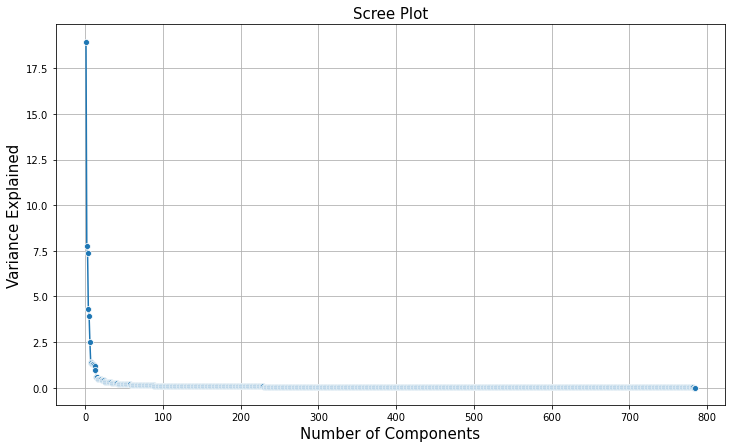

In [36]:
# Step 3 View Scree Plot to identify the number of components to be built
import seaborn as sns
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

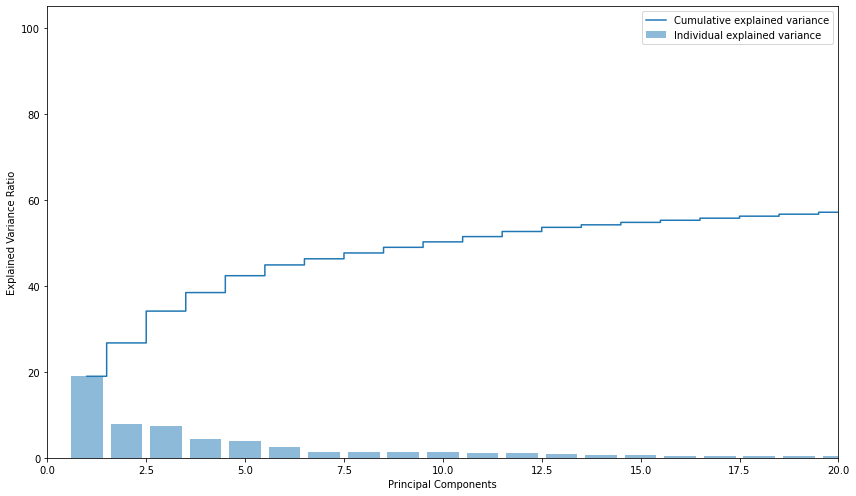

In [37]:
# Ploting 
plt.figure(figsize=(12 , 7))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.xlim(0,20)
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

## Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [40]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 2 PCA dimensions (dimensionality reduction from 9 to 7)

pca = PCA(n_components=2)
data_reduced = pca.fit_transform(X_normalized)
print("Variance of each component: ", pca.explained_variance_ratio_)
print("Total Variance Explained by components: ", round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component:  [0.18964038 0.0775886 ]
Total Variance Explained by components:  26.72


## Scatter Plot of the PCA for components = 2

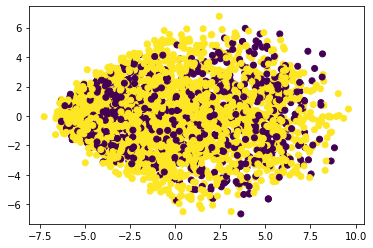

In [41]:
plt.scatter(data_reduced[:,0],data_reduced[:,1],c=Ytrain)
plt.show()

## Observations

* It can be observed PCA for 2 components is not a good choice as it only explains around 26% of the variance in the data which is not suggested to go through with for a good model. It shows a very homogeneous representation of the data and is clustered in the centre, making is difficult to distinguish between the two components
* If the reduced components are able to explain approximately 80% or higher variance then that should be the preferred number of components to make it more heterogeneous hence easy  to distinguish.
* The scatter plot for 2 component PCA is clustered with it being easier to distinguish because of different color scheme without which this would just be a clustered scatter in the centre which fail to explain much about the data.
* This might be the case as we have a flattened 2D image converted to 1D.

## ii.) Plot the scree graph of PCA and find the number of dimensions that explain 95% variance in the training set.

In [42]:
c=0
for i in cum_var_exp:
    if(i<=95):
        c+=1
    else:
        break
print('The number of dimensions that explain 95% variance in the training set is = ',c)    

The number of dimensions that explain 95% variance in the training set is =  506


In [43]:
cov_matrix = np.cov(data_reduced.T)
# print('Covariance Matrix \n%s', cov_matrix)

In [44]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
# print('Eigen Vectors \n%s', eig_vecs)
# print('\n Eigen Values \n%s', eig_vals)

In [45]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# print("Cumulative Variance Explained", cum_var_exp)

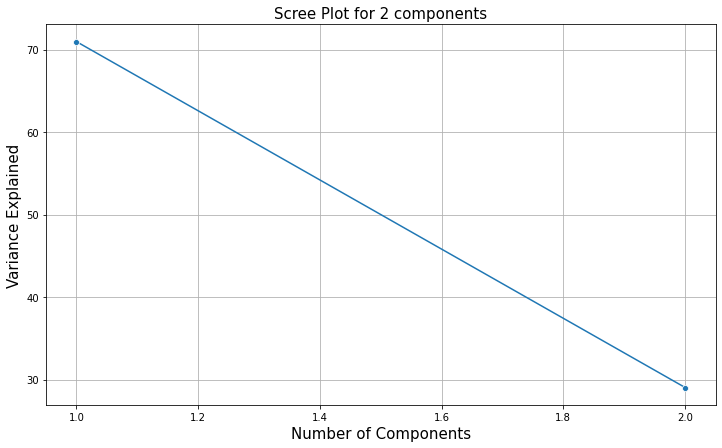

In [47]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot for 2 components',fontsize=15)
plt.grid()
plt.show()

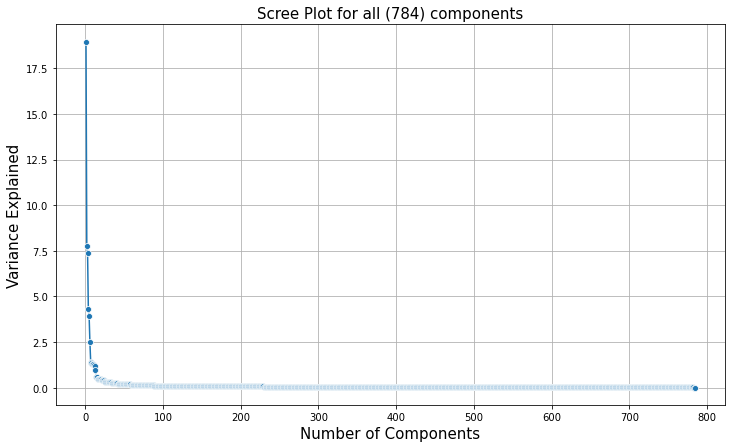

In [53]:
cov_matrix = np.cov(X_normalized.T)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import seaborn as sns
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot for all (784) components',fontsize=15)
plt.grid()
plt.show()

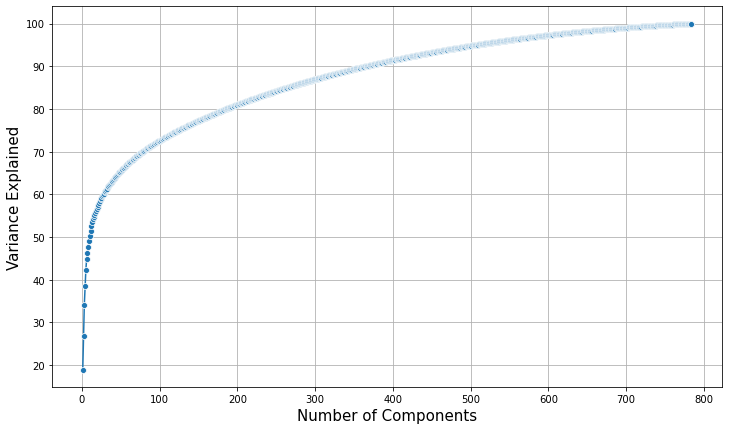

In [55]:
# Step 3 View Scree Plot to identify the number of components to be built
import seaborn as sns
plt.figure(figsize=(12,7))
sns.lineplot(y=cum_var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
# plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

# iii.) Reduce the number of dimensions of the data using PCA and perform classification. What is the (optimal) cross-validation performance of a Kernelized SVM classification with PCA? Remember to perform hyperparameter optimization

In [49]:
pca = PCA(n_components=506)
data_reduced = pca.fit_transform(X_normalized)

### Running the reduced model on our previously obtained Optimal model as KNN for n_neighbours=12 and observing results

In [50]:
folds=0
skf= StratifiedKFold(n_splits=5)
xacc=[]
xauc=[]
xpr=[]
for train_index, val_index in skf.split(data_reduced,Ytrain):
    folds+=1
    print(f'----------{folds} fold------------')
    print("Train set samples:", train_index.shape[0], "Validation Set Samples:", val_index.shape[0])
    X_train, X_val = data_reduced[train_index], data_reduced[val_index]
    y_train, y_val = Ytrain[train_index], Ytrain[val_index]
    knn=KNeighborsClassifier(n_neighbors=12)
    knn.fit(X_train,y_train)
    knn_pred_score= knn.predict_proba(X_val)[:,1]
    knn_pred= knn.predict(X_val)
    print(f'Accuracy Score: {accuracy_score(y_val,knn_pred)}')
    xacc.append(accuracy_score(y_val,knn_pred))
    print(f'AUC_ROC Score: {roc_auc_score(y_val,knn_pred_score)}')
    xauc.append(roc_auc_score(y_val,knn_pred_score))
    print(f'AUC_PR Score: {average_precision_score(y_val,knn_pred_score)}')
    xpr.append(average_precision_score(y_val,knn_pred_score))

----------1 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.72
AUC_ROC Score: 0.7551591981132075
AUC_PR Score: 0.8656315467730136
----------2 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.7366666666666667
AUC_ROC Score: 0.7876018439108061
AUC_PR Score: 0.8876798601158806
----------3 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.7533333333333333
AUC_ROC Score: 0.7816453151801029
AUC_PR Score: 0.8715501700136692
----------4 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.715
AUC_ROC Score: 0.7530218642732166
AUC_PR Score: 0.8591069241834244
----------5 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.7583333333333333
AUC_ROC Score: 0.7951676884240895
AUC_PR Score: 0.8854785778098834


In [51]:
print("Mean of Accuracies: ",np.round(np.mean(xacc),3))
print("Mean of AUC_ROC: ",np.round(np.mean(xauc),3))
print("Mean of AUC_PR: ",np.round(np.mean(xpr),3))

Mean of Accuracies:  0.737
Mean of AUC_ROC:  0.775
Mean of AUC_PR:  0.874


In [52]:
print("Standard Deviation of Accuracies: ",np.round(np.std(xacc),3))
print("Standard Deviation of AUC_ROC: ",np.round(np.std(xauc),3))
print("Standard Deviation of AUC_PR: ",np.round(np.std(xpr),3))

Standard Deviation of Accuracies:  0.017
Standard Deviation of AUC_ROC:  0.017
Standard Deviation of AUC_PR:  0.011


## Repeating the GridSearchCV method and obtaining best  scores for 5 fold stratified cross validation for all 5 classifiers to see which model performs the best.

## KNN

In [80]:

#create new a knn model
knn3 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 40),
             'weights':['distance'], # other weight 'uniform'
             'metric':['euclidean']}
#use gridsearch to test all values for n_neighbors
knn_pca = GridSearchCV(knn3, param_grid, cv=5,scoring='average_precision',n_jobs=-1)
#fit model to data
knn_pca.fit(data_reduced, Ytrain)
print("Optimal Parameter: ", knn_pca.best_params_)
print("Best Estimator: ", knn_pca.best_estimator_)
print("Best Score: ", knn_pca.best_score_)

Optimal Parameter:  {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Best Estimator:  KNeighborsClassifier(metric='euclidean', n_neighbors=11, weights='distance')
Best Score:  0.8983140072596733


In [81]:
kp_par=knn_pca.best_params_
kp_score=knn_pca.best_score_

## Perceptron

In [57]:
per = Perceptron( random_state=0)

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'eta0':[0.0001,0.001,0.01,0.1,1.0],
             'max_iter':[1, 10, 100, 1000, 10000]}

#use gridsearch to test all values for n_neighbors
per_pca = GridSearchCV(per, param_grid, cv=5,scoring="precision",n_jobs=-1)
#fit model to data
per_pca.fit(data_reduced, Ytrain)
print("Optimal Parameter: ", per_pca.best_params_)
print("Best Estimator: ", per_pca.best_estimator_)
print("Best Score: ", per_pca.best_score_)

Optimal Parameter:  {'eta0': 0.0001, 'max_iter': 10}
Best Estimator:  Perceptron(eta0=0.0001, max_iter=10)
Best Score:  0.7341292389677563


In [68]:
perp_par=per_pca.best_params_
perp_score=per_pca.best_score_

## Naive Bayes

In [266]:
# don't use Naive Bayes with SVD or other matrix factorization because Naive Bayes based on applying 
# Bayes' theorem with strong (naive) independence assumptions between the features

In [60]:
bnb = BernoulliNB()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'alpha': [0.0001,0.001,0.01,0.1,1.0,10.0]}

#use gridsearch to test all values for n_neighbors
bnb_pca = GridSearchCV(bnb, param_grid, cv=5,scoring="average_precision",n_jobs=-1)
bnb_pca.fit(data_reduced, Ytrain)
print("Optimal Parameter: ", bnb_pca.best_params_)
print("Best Estimator: ", bnb_pca.best_estimator_)
print("Best Score: ", bnb_pca.best_score_)

Optimal Parameter:  {'alpha': 10.0}
Best Estimator:  BernoulliNB(alpha=10.0)
Best Score:  0.7498822880507339


In [69]:
nbp_par=bnb_pca.best_params_
nbp_score=bnb_pca.best_score_

## Logistic Regression

In [61]:
lr=LogisticRegression()

param_grid ={
     'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20)
    }
    
#use gridsearch to test all values for n_neighbors
lr_pca = GridSearchCV(lr, param_grid, cv=skf,scoring="precision")
#fit model to data
lr_pca.fit(data_reduced, Ytrain)
print("Optimal Parameter: ", lr_pca.best_params_)
print("Best Estimator: ", lr_pca.best_estimator_)
print("Best Score: ", lr_pca.best_score_)

Optimal Parameter:  {'C': 1.623776739188721, 'penalty': 'l2'}
Best Estimator:  LogisticRegression(C=1.623776739188721)
Best Score:  0.7276211639316942


In [70]:
lrp_par=lr_pca.best_params_
lrp_score=lr_pca.best_score_

## Linear SVM

In [63]:
from sklearn.svm import SVC
svm=SVC()
param_grid = {'C': [0.0001], # Other values [0.001,0.01,0.1, 1, 10, 100, 1000]
              'gamma': [1],  # Other values [0.1, 0.01, 0.001, 0.0001]
              'kernel':['linear'],
             }
    
#use gridsearch to test all values for n_neighbors
svm_pca = GridSearchCV(svm, param_grid, cv=skf,scoring="average_precision",n_jobs=-1)
#fit model to data
svm_pca.fit(data_reduced, Ytrain)
print("Optimal Parameter: ", svm_pca.best_params_)
print("Best Estimator: ", svm_pca.best_estimator_)
print("Best Score: ", svm_pca.best_score_)

Optimal Parameter:  {'C': 0.0001, 'gamma': 1, 'kernel': 'linear'}
Best Estimator:  SVC(C=0.0001, gamma=1, kernel='linear')
Best Score:  0.7548175603771181


In [71]:
lsvmp_par=svm_pca.best_params_
lsvmp_score=svm_pca.best_score_

## Kernalized SVM

In [65]:
from sklearn.svm import SVC
svm=SVC()
param_grid = {'C': [0.0001,10],# Other values [0.001,0.01,0.1, 1, 100, 1000]
              'gamma': [1, 0.1], #Other values [0.01, 0.001, 0.0001]
              'kernel': ['poly', 'rbf', 'sigmoid']}
    
#use gridsearch to test all values for n_neighbors
svm_pca2 = GridSearchCV(svm, param_grid, cv=5,scoring="average_precision",n_jobs=-1)
#fit model to data
svm_pca2.fit(data_reduced, Ytrain)
print("Optimal Parameter: ", svm_pca2.best_params_)
print("Best Estimator: ", svm_pca2.best_estimator_)
print("Best Score: ", svm_pca2.best_score_)

Optimal Parameter:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Estimator:  SVC(C=10, gamma=0.1)
Best Score:  0.8900952635517478


In [72]:
ksvmp_par=svm_pca2.best_params_
ksvmp_score=svm_pca2.best_score_

In [82]:
table2=pd.DataFrame({"Classifiers":['KNN',"Perceptron",'Bernoulli Naive Bayes','Logistic Regression','Linear SVM','Kernalized SVM'],"PCA Scores":[kp_score,perp_score,nbp_score,lrp_score,lsvmp_score,ksvmp_score]})
table2

,Classifiers,PCA Scores
0,KNN,0.898314
1,Perceptron,0.734129
2,Bernoulli Naive Bayes,0.749882
3,Logistic Regression,0.727621
4,Linear SVM,0.754818
5,Kernalized SVM,0.890095


### Here the best performing models for PCA is Kernalized SVM having a score of ~89% and KNN having a score of ~90% .

### KNN performing the best with n_neighbours=11.

## The performance of (optimal) Kernalized SVM is as follows:

In [74]:
stratifiedkf(data_reduced,svm_pca2)

----------------------Fold 1 -----------------'
Prediction Accuracy: 0.73 
 AUC_ROC: 0.7512596483704974 
 AUC_PR: 0.8723828666940927
----------------------Fold 2 -----------------'
Prediction Accuracy: 0.7166666666666667 
 AUC_ROC: 0.7596215694682675 
 AUC_PR: 0.8911442217045318
----------------------Fold 3 -----------------'
Prediction Accuracy: 0.765 
 AUC_ROC: 0.778958512006861 
 AUC_PR: 0.8852771782952026
----------------------Fold 4 -----------------'
Prediction Accuracy: 0.7783333333333333 
 AUC_ROC: 0.7988540289297592 
 AUC_PR: 0.8762092920770843
----------------------Fold 5 -----------------'
Prediction Accuracy: 0.7666666666666667 
 AUC_ROC: 0.8084438567669725 
 AUC_PR: 0.8977604223959674
___________________________________________________________
--Mean of the Respective Performance Metric


Accuracy Mean: 0.7513
AUC_ROC Mean: 0.7794
AUC_PR Mean: 0.8846
___________________________________________________________
--Standard Deviation of the Respective Performance Metric


Accu

# Question No. 5 
# Develop an optimal pipeline for classification based on your analysis (Q1-Q4). You are free to use any tools at your disposal. However, no external data sources may be used. Describe your pipeline and report your results over the test data set. (You are required to submit your prediction file together with the assignment in a zip folder). Your prediction file should be a single column file containing the prediction score of the corresponding example in Xtest (be sure to have the same order!)

### --> To Develop the Optimal Pipeline, equal importance is given to all the stages from our analysis.

* From the Analysis done on the questions Q1-Q4, we have performed 5 fold stratified cross validation on 5 classifiers namely KNN, Perceptron, Naive Bayes, Logistic Regression, Linear SVM and Kernalized SVM.

* This was performed by loading the datasets in Q1, observing what the data looks like, calculating positive and negative values which clearly showed a class imbalance. Running a random Dummy Classifier from where we chose <b>AUC_PR</b> as our choice of performance metrics.
* For model performance Accuracy, AUC_ROC, AUC_PR for all 5 folds will be tested and mean and standard deviation will be observed to choose the optimal solution for our classification. 
* Followed by performing various forms of preprocessing techniques like StandardScaler, Min_Max_Scaler and Normalization. Each of the 3 methods gave near identical results , however, <b>Normalization</b> worked slightly better, giving the highest accuracy and the lowest standard deviation.
* Further on for our parts Q3 and Q4 the same normalized train data has been used instead of the initial unpreprocessed data.
* Moving to Q3 all the 5 classifiers were tested for 5 fold stratified cross validation and the best model was chosen amongst all 5 classifiers namely KNN, Perceptron, Naive Bayes, Logistic Regression, Linear SVM and Kernalized SVM..
* For each classifier the <b>hyperparameter tuning</b> was performed using <b>GridSearchCV</b> to get optimal results for all classifier.
* The results of this were then appended in the form of a table as shown below which gives <b>KNN  {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'} as the best performing model</b>.
* <b> In Q4 we performed PCA and reduced dimensions from 784 to 506 which explains 95% variance in the data.</b> 
* This reduced training data was then used to again build 5 fold stratified cross validation model for all the 5 classifiers using same Normalized Pre-Processing and GridSearchCV.
* Again completing this we obtained <b>KNN  {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'} as the optimal model for PCA</b>.
* Now to make a choice between which is the best model we compared the two output tables as shown below from which we could observe the Classification Score for KNN for n_neighbours = 12 without PCA was working slightly better as compared to the KNN with PCA.
* Hence coming to the conclusion that <b>KNN {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}</b> without PCA and using normalized preprocessing method is the optimal model out of all the classifiers from Q1-Q4.
* Once obtained our optimal method we then predicted the values and are submitted along with this notebook.

In [107]:
# Classification Scores on Preprocessed Data without PCA
print('Classification Scores on Preprocessed Data without PCA:')
table

Classification Scores on Preprocessed Data without PCA:


,Classifiers,Scores
0,KNN,0.898956
1,Perceptron,0.752105
2,Multinomial Naive Bayes,0.749573
3,Bernoulli Naive Bayes,0.781898
4,Gaussian Naive Bayes,0.766984
5,Logistic Regression,0.769154
6,Linear SVM,0.746816
7,Kernalized SVM,0.885852


In [108]:
# Classification Scores on Preprocessed Data with PCA
print('Classification Scores on Preprocessed Data with PCA:')
table2

Classification Scores on Preprocessed Data with PCA:


,Classifiers,PCA Scores
0,KNN,0.898314
1,Perceptron,0.734129
2,Bernoulli Naive Bayes,0.749882
3,Logistic Regression,0.727621
4,Linear SVM,0.754818
5,Kernalized SVM,0.890095


### Overall from all the model's created for each of the 5 classifiers, KNN with n_neighbours=12 is giving us the optimal results with a score of ~90% hence we will go forward with KNN.

## The model's performance can be observed below

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score

folds=0
skf= StratifiedKFold(n_splits=5)
xacc=[]
xauc=[]
xpr=[]
for train_index, val_index in skf.split(X_normalized,Ytrain):
    folds+=1
    print(f'----------{folds} fold------------')
    print("Train set samples:", train_index.shape[0], "Validation Set Samples:", val_index.shape[0])
    X_train, X_val = X_normalized[train_index], X_normalized[val_index]
    y_train, y_val = Ytrain[train_index], Ytrain[val_index]
    knn=KNeighborsClassifier(n_neighbors=12,weights='distance',metric='euclidean')
    knn.fit(X_train,y_train)
    knn_pred_score= knn.predict_proba(X_val)[:,1]
    knn_pred= knn.predict(X_val)
    print(f'Accuracy Score: {accuracy_score(y_val,knn_pred)}')
    xacc.append(accuracy_score(y_val,knn_pred))
    print(f'AUC_ROC Score: {roc_auc_score(y_val,knn_pred_score)}')
    xauc.append(roc_auc_score(y_val,knn_pred_score))
    print(f'AUC_PR Score: {average_precision_score(y_val,knn_pred_score)}')
    xpr.append(average_precision_score(y_val,knn_pred_score))

----------1 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.7483333333333333
AUC_ROC Score: 0.7763722126929674
AUC_PR Score: 0.8855134514436112
----------2 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.7583333333333333
AUC_ROC Score: 0.8085870497427101
AUC_PR Score: 0.9105407299933832
----------3 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.79
AUC_ROC Score: 0.8072871998284734
AUC_PR Score: 0.8993280594365555
----------4 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.7566666666666667
AUC_ROC Score: 0.7813706241401878
AUC_PR Score: 0.8879066190411934
----------5 fold------------
Train set samples: 2400 Validation Set Samples: 600
Accuracy Score: 0.78
AUC_ROC Score: 0.8242577232840484
AUC_PR Score: 0.9114899040905681


### Mean and Standard deviation of Scores from the optimal model.

In [31]:
print("Mean of Accuracies: ",np.round(np.mean(xacc),4))
print("Mean of AUC_ROC: ",np.round(np.mean(xauc),4))
print("Mean of AUC_PR: ",np.round(np.mean(xpr),4))

Mean of Accuracies:  0.7667
Mean of AUC_ROC:  0.7996
Mean of AUC_PR:  0.899


In [32]:
print("Standard Deviation of Accuracies: ",np.round(np.std(xacc),4))
print("Standard Deviation of AUC_ROC: ",np.round(np.std(xauc),4))
print("Standard Deviation of AUC_PR: ",np.round(np.std(xpr),4))

Standard Deviation of Accuracies:  0.0157
Standard Deviation of AUC_ROC:  0.018
Standard Deviation of AUC_PR:  0.0109


### Now its time to use this trained model to predict our outcomes which we will then save into a csv file.

In [84]:
knn = KNeighborsClassifier(n_neighbors=12,weights='distance',metric='euclidean').fit(X_normalized, Ytrain)

In [85]:
knn.fit(X_normalized,Ytrain)

KNeighborsClassifier(metric='euclidean', n_neighbors=12, weights='distance')

In [86]:
# prediction_score=
knn_pred_score= knn.predict_proba(Xtest)[:,1]
knn_pred= knn.predict(Xtest)

In [87]:
knn_pred_score

array([0.83333634, 0.74999135, 0.9166565 , ..., 0.83333657, 0.91667551,
       0.91666551])

### Appending our scores to a table  and then converting it to a csv file.

In [88]:
df= pd.DataFrame({"Prediction_Score":knn_pred_score})

In [89]:
len(df)

3000

In [90]:
df.index = np.arange(1, len(df)+1)

In [91]:
df.to_csv('u2143030.csv',index=False)

In [94]:
df

,Prediction_Score
1,0.833336
2,0.749991
3,0.916657
4,0.750011
5,0.749999
...,...
2996,0.750013
2997,0.750009
2998,0.833337
2999,0.916676
